In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import numpy as np
import matplotlib.patches as patches

In [2]:

# ---- grids / mappings ----
NUM_SPACING = 29          # adjust if needed
NUM_WIDTH   = 10

spacing_um = np.linspace(2.0, 30.0, NUM_SPACING)   # 0→2 µm, 28→30 µm
width_um   = np.linspace(1.0, 10.0, NUM_WIDTH)     # 0→1 µm, 9→10 µm
doping_map = {
    0: "intrinsic",
    1: "1e15 cm^-3",
    2: "1e16 cm^-3",
    3: "1e17 cm^-3",
}
mode_map = {0: "A0", 1: "S0"}

def load_measure(path, value_name):
    # CSV has no header; five columns as described
    df = pd.read_csv(path, header=None, names=[
        "spacing_idx", "width_idx", "doping_idx", "mode_idx", value_name
    ])
    # attach physical labels (keep indices too)
    df["spacing_um"] = df["spacing_idx"].map({i:v for i,v in enumerate(spacing_um)})
    df["width_um"]   = df["width_idx"].map({i:v for i,v in enumerate(width_um)})
    df["doping"]     = df["doping_idx"].map(doping_map)
    df["mode"]       = df["mode_idx"].map(mode_map)
    return df

# Examples:
Qdf     = load_measure("./data/Q.csv",     "Q")
fdf     = load_measure("./data/freq.csv",  "freq_Hz")
k2em_df = load_measure("./data/k2_em.csv", "k2_em")   # unitless (e.g., 0.006 = 0.6%)
k2fd_df = load_measure("./data/k2_fd.csv", "k2_fd")
Lm_df   = load_measure("./data/Lm.csv",    "Lm_H")
Rm_df   = load_measure("./data/Rm.csv",    "Rm_ohm")
Cm_df   = load_measure("./data/Cm.csv",    "Cm_F")

# sanity peek
Qdf.head(10)


,spacing_idx,width_idx,doping_idx,mode_idx,Q,spacing_um,width_um,doping,mode
0,0,0,0,0,NaN,2.0,1.0,intrinsic,A0
1,0,0,0,1,NaN,2.0,1.0,intrinsic,S0
2,0,0,1,0,NaN,2.0,1.0,1e15 cm^-3,A0
3,0,0,1,1,NaN,2.0,1.0,1e15 cm^-3,S0
4,0,0,2,0,NaN,2.0,1.0,1e16 cm^-3,A0
5,0,0,2,1,NaN,2.0,1.0,1e16 cm^-3,S0
6,0,0,3,0,NaN,2.0,1.0,1e17 cm^-3,A0
7,0,0,3,1,NaN,2.0,1.0,1e17 cm^-3,S0
8,0,1,0,0,2540.518169,2.0,2.0,intrinsic,A0
9,0,1,0,1,1537.325943,2.0,2.0,intrinsic,S0


In [34]:
keys = ["spacing_idx","width_idx","doping_idx","mode_idx","spacing_um","width_um"]
df = (Qdf[keys+["Q"]]
      .merge(fdf[keys+["freq_Hz"]],   on=keys, how="inner")
      .merge(k2em_df[keys+["k2_em"]], on=keys, how="inner")
     .merge(k2fd_df[keys+["k2_fd"]],   on=keys, how="inner"))
# then use the plotting code from the merged-df section
df.head()

,spacing_idx,width_idx,doping_idx,mode_idx,spacing_um,width_um,Q,freq_Hz,k2_em,k2_fd
0,0,0,0,0,2.0,1.0,NaN,NaN,NaN,NaN
1,0,0,0,1,2.0,1.0,NaN,NaN,NaN,NaN
2,0,0,1,0,2.0,1.0,NaN,NaN,NaN,NaN
3,0,0,1,1,2.0,1.0,NaN,NaN,NaN,NaN
4,0,0,2,0,2.0,1.0,NaN,NaN,NaN,NaN


In [4]:
undamped_data = {
    "lambda": [7.000E-06,8.000E-06,9.000E-06,1.000E-05,1.100E-05,1.200E-05,1.300E-05,1.400E-05,1.50E-05,1.60E-05,2.00E-05,2.60E-05,4.00E-05,8.00E-05],
    "hGan/Lambda": [0.63, 0.55, 0.49, 0.440, 0.400, 0.367, 0.338,0.314,0.293,0.275,0.220,0.169, .110,.055],
    "Antisymmetric ksq%": [0.055, 0.081, 0.103, 0.121, 0.134, 0.143, 0.148,0.150 ,0.152,0.149, 0.134,0.105,.064,.031],
    "Symmetric ksq%": [0.275, 0.358, 0.448, 0.533, 0.602, 0.643, 0.652,0.641,0.624,0.604,.56,.552,0.567,.576]
}
undamped_df = pd.DataFrame(undamped_data)

### plot $N_d = 10^{15}\, k^2$ vs Popa ref., at width = $2\mu m$ 

Text(0, 0.5, '$k^2$ [%]')

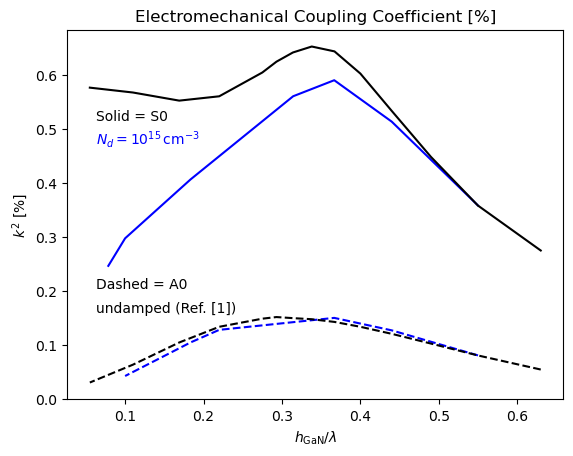

In [6]:
hGaN_um   = 4.4
width_sel = 2.0
Nd_idx    = 1          # 1e15 cm^-3
modes     = {0:"A0", 1:"S0"}
style     = {0:"--",  1:"-"}   # A0 dashed, S0 solid

# keep only the relevant slice
dfA0 = df[(df["width_um"]==width_sel) & (df["doping_idx"]==Nd_idx) & (df["mode_idx"] == 0)] .copy()
dfS0 = df[(df["width_um"]==width_sel) & (df["doping_idx"]==Nd_idx) & (df["mode_idx"] == 1)] .copy()

# NaN/Inf guard for each plot
df_k2_A0 = dfA0[np.isfinite(dfA0['k2_fd'])].copy()
df_k2_S0 = dfS0[np.isfinite(dfS0['k2_fd'])].copy()

# derive axes
df_k2_A0["lambda_um"]     = 2.0*(df_k2_A0["spacing_um"] + df_k2_A0["width_um"])
df_k2_A0['hGaN/lambda'] = hGaN_um / df_k2_A0["lambda_um"]
df_k2_S0["lambda_um"]     = 2.0*(df_k2_S0["spacing_um"] + df_k2_S0["width_um"])
df_k2_S0['hGaN/lambda'] = hGaN_um / df_k2_S0["lambda_um"]


fig, ax = plt.subplots()
# curves of Nd = 1e16 are red, with red text stating Nd = 1e16
#curves of Nd = 1e15 are blue, with blue text stating Nd = 1e15
# undamped curves are black, with black text stating 'undamped'
# A0 modes are dashed, S0 modes are solid

ax.plot(df_k2_A0['hGaN/lambda'], df_k2_A0['k2_fd'], color='b', linestyle='--')#, label = r'$k^2 [\%]$')
ax.plot(df_k2_S0['hGaN/lambda'], df_k2_S0['k2_fd'], color='b', linestyle='-')#, label = r'$k^2 [\%]$')
ax.plot(undamped_df["hGan/Lambda"], undamped_df["Antisymmetric ksq%"], color='k', linestyle='--')#, label = r'$k^2 [\%]$')
ax.plot(undamped_df["hGan/Lambda"], undamped_df["Symmetric ksq%"], color='k', linestyle='-')#, label = r'$k^2 [\%]$')
# Annotations
# Nd annotations in figure coordinates (left, midway up)

ax.annotate(r'$N_d = 10^{15} \,\text{cm}^{-3}$', xy=(0.15, 0.65), xycoords='figure fraction', color='b', fontsize=10)
ax.annotate('undamped (Ref. [1])', xy=(0.15, 0.3), xycoords='figure fraction', color='k', fontsize=10)
# Mode annotations
ax.annotate('Dashed = A0', xy=(0.15, 0.35), xycoords='figure fraction', color='k', fontsize=10)
ax.annotate('Solid = S0', xy=(0.15, 0.7), xycoords='figure fraction', color='k', fontsize=10)


ax.set_xlabel(r'$h_{\mathrm{GaN}}/\lambda$')
ax.set_title('Electromechanical Coupling Coefficient [%]')
ax.set_ylabel(r'$k^2$ [%]')

### Old plot for comparison 
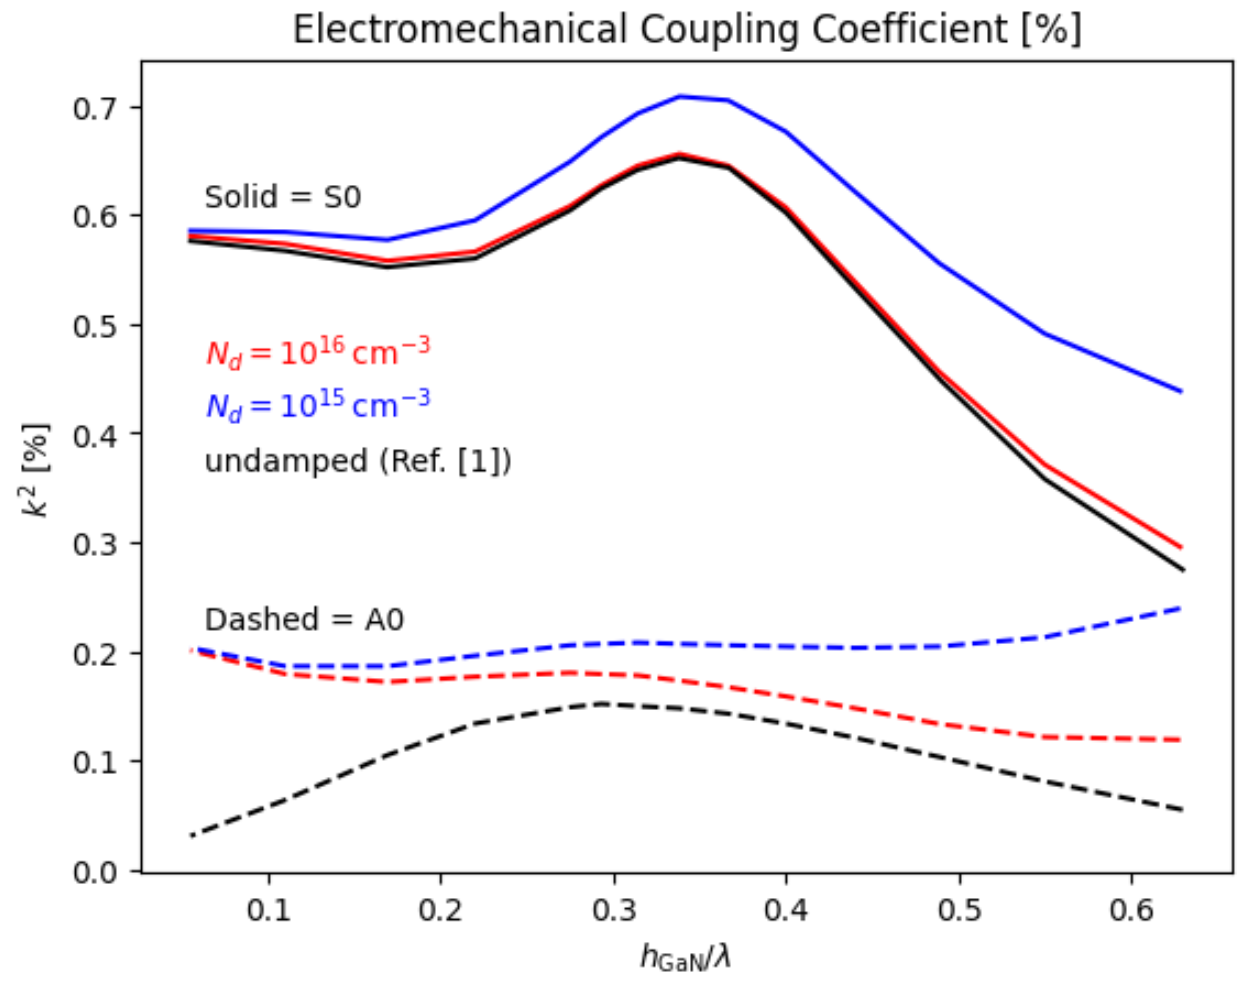

### check eigenmode $k^2$ (doesn't work)

Text(0, 0.5, '$k^2$ [%]')

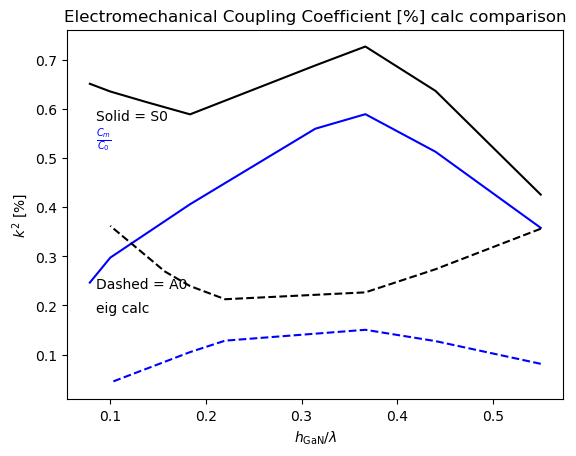

In [7]:

# NaN/Inf guard for each plot
df_k2_A0 = dfA0[np.isfinite(dfA0['k2_fd'])].copy()
df_k2_S0 = dfS0[np.isfinite(dfS0['k2_fd'])].copy()

# derive axes
df_k2_A0["lambda_um"]     = 2.0*(df_k2_A0["spacing_um"] + df_k2_A0["width_um"])
df_k2_A0['hGaN/lambda'] = hGaN_um / df_k2_A0["lambda_um"]
df_k2_S0["lambda_um"]     = 2.0*(df_k2_S0["spacing_um"] + df_k2_S0["width_um"])
df_k2_S0['hGaN/lambda'] = hGaN_um / df_k2_S0["lambda_um"]


fig, ax = plt.subplots()
# curves of Nd = 1e16 are red, with red text stating Nd = 1e16
#curves of Nd = 1e15 are blue, with blue text stating Nd = 1e15
# undamped curves are black, with black text stating 'undamped'
# A0 modes are dashed, S0 modes are solid

ax.plot(df_k2_A0['hGaN/lambda'], df_k2_A0['k2_fd'], color='b', linestyle='--')#, label = r'$k^2 [\%]$')
ax.plot(df_k2_S0['hGaN/lambda'], df_k2_S0['k2_fd'], color='b', linestyle='-')#, label = r'$k^2 [\%]$')
ax.plot(df_k2_A0['hGaN/lambda'], df_k2_A0['k2_em'], color='k', linestyle='--')#, label = r'$k^2 [\%]$')
ax.plot(df_k2_S0['hGaN/lambda'], df_k2_S0['k2_em'], color='k', linestyle='-')#, label = r'$k^2 [\%]$')
# Annotations
# Nd annotations in figure coordinates (left, midway up)

ax.annotate(r'$\frac{C_m}{C_0}$', xy=(0.15, 0.65), xycoords='figure fraction', color='b', fontsize=10)
ax.annotate('eig calc', xy=(0.15, 0.3), xycoords='figure fraction', color='k', fontsize=10)
# Mode annotations
ax.annotate('Dashed = A0', xy=(0.15, 0.35), xycoords='figure fraction', color='k', fontsize=10)
ax.annotate('Solid = S0', xy=(0.15, 0.7), xycoords='figure fraction', color='k', fontsize=10)


ax.set_xlabel(r'$h_{\mathrm{GaN}}/\lambda$')
ax.set_title('Electromechanical Coupling Coefficient [%] calc comparison')
ax.set_ylabel(r'$k^2$ [%]')

### plot $f\cdot Q$ product for $N_d = 10^{15}$ at width = $2\mu m$ 

Text(0, 0.5, '$f\\cdot Q$ Product $[\\cdot 10^{11}]$')

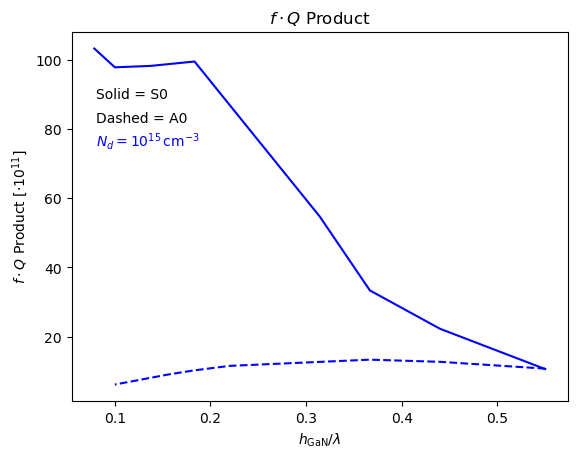

In [8]:


# NaN/Inf guard for each plot
df_Q_A0 = dfA0[np.isfinite(dfA0['Q'])].copy()
df_Q_S0 = dfS0[np.isfinite(dfS0['Q'])].copy()
# derive axes
df_Q_A0["lambda_um"]     = 2.0*(df_Q_A0["spacing_um"] + df_Q_A0["width_um"])
df_Q_A0['hGaN/lambda'] = hGaN_um / df_Q_A0["lambda_um"]
df_Q_S0["lambda_um"]     = 2.0*(df_Q_S0["spacing_um"] + df_Q_S0["width_um"])
df_Q_S0['hGaN/lambda'] = hGaN_um / df_Q_S0["lambda_um"]


fig, ax = plt.subplots()
# curves of Nd = 1e16 are red, with red text stating Nd = 1e16
#curves of Nd = 1e15 are blue, with blue text stating Nd = 1e15
# undamped curves are black, with black text stating 'undamped'
# A0 modes are dashed, S0 modes are solid
ax.plot(df_Q_A0['hGaN/lambda'], df_Q_A0['Q']*df_Q_A0['freq_Hz']/1e11, color='b', linestyle='--')#, label = r'$k^2 [\%]$')
ax.plot(df_Q_S0['hGaN/lambda'], df_Q_S0['Q']*df_Q_S0['freq_Hz']/1e11, color='b', linestyle='-')#, label = r'$k^2 [\%]$')

# Mode annotations
ax.annotate('Dashed = A0', xy=(0.15, 0.7), xycoords='figure fraction', color='k', fontsize=10)
ax.annotate('Solid = S0', xy=(0.15, 0.75), xycoords='figure fraction', color='k', fontsize=10)
ax.annotate(r'$N_d = 10^{15} \,\text{cm}^{-3}$', xy=(0.15, 0.65), xycoords='figure fraction', color='b', fontsize=10)
ax.set_xlabel(r'$h_{\mathrm{GaN}}/\lambda$')
ax.set_title(r'$f\cdot Q$ Product')
ax.set_ylabel(r'$f\cdot Q$ Product $[\cdot 10^{11}]$')

### plot from poster for comparison, width = $2 \mu m$


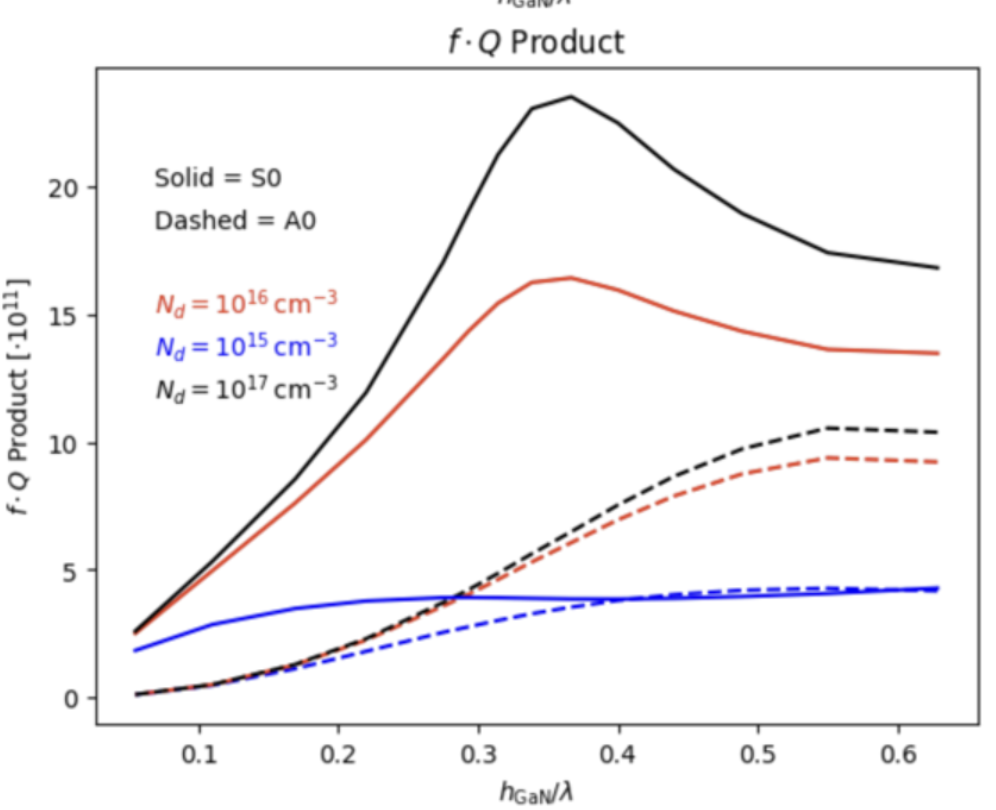

### plot $k^2$ and $Q$ as width varies for a fixed $\lambda$

Text(0, 0.5, '$Q$')

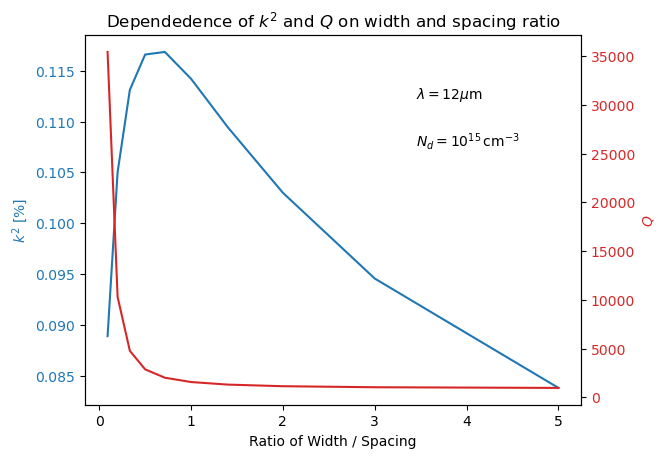

In [32]:
#hGaN_um   = 4.4
lambda_sel = 24.0
Nd_idx    = 1          # 1e15 cm^-3
df["lambda_um"]     = 2.0*(df["spacing_um"] + df["width_um"])
# keep only the relevant slice
dfA0 = df[(df["lambda_um"]==lambda_sel) & (df["doping_idx"]==Nd_idx) & (df["mode_idx"] == 0)] .copy()
dfS0 = df[(df["lambda_um"]==lambda_sel) & (df["doping_idx"]==Nd_idx) & (df["mode_idx"] == 1)] .copy()

# NaN/Inf guard for each plot
dfA0 = dfA0[np.isfinite(dfA0['k2_fd'])].copy()
dfS0 = dfS0[np.isfinite(dfS0['k2_fd'])].copy()

# derive axes
dfA0['w_s_ratio'] = dfA0["width_um"] / dfA0["spacing_um"]
dfS0['w_s_ratio'] = dfS0["width_um"] / dfS0["spacing_um"]
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot( dfA0['w_s_ratio'], dfA0['k2_fd'], color="tab:blue")
ax2.plot( dfA0['w_s_ratio'], dfA0['Q'], color = "tab:red")
ax.annotate(r'$\lambda= 12\mu$m', xy=(0.65, 0.75), xycoords='figure fraction', color='k', fontsize=10)
ax.annotate(r'$N_d = 10^{15} \,\text{cm}^{-3}$', xy=(0.65, 0.65), xycoords='figure fraction', color='k', fontsize=10)
ax.set_xlabel(r'Ratio of Width / Spacing')
ax.tick_params(axis="y", labelcolor="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax.set_title(r'Dependedence of $k^2$ and $Q$ on width and spacing ratio')
ax.set_ylabel(r'$k^2$ [%]', color="tab:blue")
ax2.set_ylabel(r'$Q$', color="tab:red")

In [33]:
dfA0

,spacing_idx,width_idx,doping_idx,mode_idx,spacing_um,width_um,Q,freq_Hz,k2_em,k2_fd,lambda,lambda_um,w_s_ratio
74,0,9,1,0,2.0,10.0,964.528308,9.851481e+07,0.136894,0.083811,24.0,24.0,5.000000
146,1,8,1,0,3.0,9.0,1034.574222,9.865180e+07,0.148507,0.094561,24.0,24.0,3.000000
218,2,7,1,0,4.0,8.0,1139.297500,9.874909e+07,0.159403,0.102990,24.0,24.0,2.000000
290,3,6,1,0,5.0,7.0,1305.508170,9.880754e+07,0.170683,0.109434,24.0,24.0,1.400000
362,4,5,1,0,6.0,6.0,1568.255235,9.885847e+07,0.182833,0.114196,24.0,24.0,1.000000
434,5,4,1,0,7.0,5.0,2013.080876,9.893500e+07,0.196115,0.116841,24.0,24.0,0.714286
506,6,3,1,0,8.0,4.0,2865.472885,9.906711e+07,0.210386,0.116584,24.0,24.0,0.500000
578,7,2,1,0,9.0,3.0,4772.390673,9.933328e+07,0.225281,0.113104,24.0,24.0,0.333333
650,8,1,1,0,10.0,2.0,10300.325790,9.985801e+07,0.239622,0.105021,24.0,24.0,0.200000
722,9,0,1,0,11.0,1.0,35426.192645,1.007992e+08,0.252242,0.088905,24.0,24.0,0.090909
